In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem
from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'morgan'
group_size = 1
num_exps = 120
num_repeats_per_exp = 5

policies = [
    'ens jensen greedy',
    'classical ens',
    'greedy'
]

n_classes = group_size + 1
init_size = 1
budget = 500

basepath = os.path.join('../../data/results', data)


probs = np.ones(
    (len(policies), num_exps, num_repeats_per_exp, budget)
) * -1

for p_ind, policy in enumerate(policies):
    for exp_ind in range(num_exps):
        path = os.path.join(basepath, f'{data}{exp_ind + 1}', str(group_size), policy)
        for i in range(num_repeats_per_exp):
            tmp_probs = np.loadtxt(
                os.path.join(path, f'{policy}__probs__{i + 1}.csv'), 
                delimiter=','
            )[:, 1]

            probs[p_ind, exp_ind, i, :] = tmp_probs
        
assert np.all(probs != -1)

In [3]:
squeezed_probs = probs.reshape(
    len(policies), 
    num_exps * num_repeats_per_exp,
    budget
)

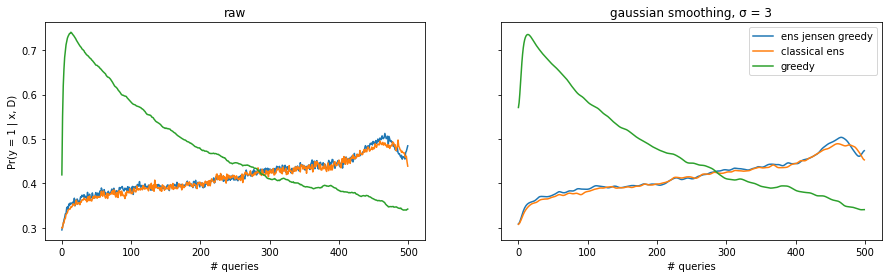

In [4]:
sigma = 3

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

for p_ind, policy in enumerate(policies):
    ax[0].plot(squeezed_probs[p_ind].mean(axis=0), label=policy)
    
for p_ind, policy in enumerate(policies):
    ax[1].plot(
        gaussian_filter1d(squeezed_probs[p_ind].mean(axis=0), sigma=sigma), 
        label=policy
    )
    
ax[0].set_title('raw')
ax[1].set_title(f'gaussian smoothing, σ = {sigma}')
    
ax[0].set_xlabel('# queries')
ax[1].set_xlabel('# queries')

ax[0].set_ylabel('Pr(y = 1 | x, D)')

ax[1].legend();

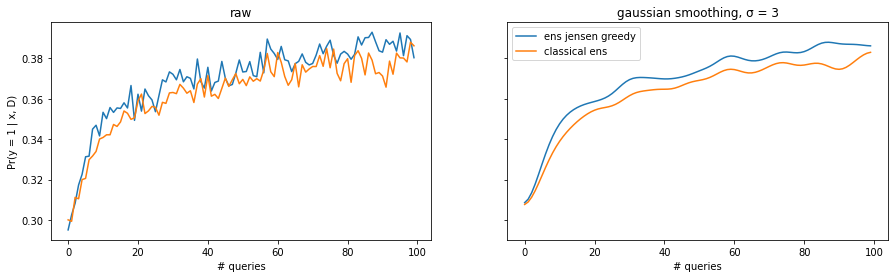

In [5]:
sigma = 3
cutoff = 100

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

for p_ind, policy in enumerate(policies):
    ax[0].plot(squeezed_probs[p_ind].mean(axis=0)[:cutoff], label=policy)
    
for p_ind, policy in enumerate(policies):
    ax[1].plot(
        gaussian_filter1d(squeezed_probs[p_ind].mean(axis=0)[:cutoff], sigma=sigma), 
        label=policy
    )
    
ax[0].set_title('raw')
ax[1].set_title(f'gaussian smoothing, σ = {sigma}')
    
ax[0].set_xlabel('# queries')
ax[1].set_xlabel('# queries')

ax[0].set_ylabel('Pr(y = 1 | x, D)')

ax[1].legend();